In [60]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="whitegrid", palette=sns.color_palette("RdBu", n_colors=2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob



In [131]:
def m_to_cm(x):
    return x * 100
def unit(x):
    return x
def scale_to_rads(x):
    return 20 * x

fsm_map = [
    {'name': 'Wheel Base'        , 'default': 0.08, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Track Width'       , 'default': 0.12, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Wheel Radius'      , 'default': 0.02, 'minval': 0.02, 'maxval': 0.03, 'T': m_to_cm},
    {'name': 'Weg Count'         , 'default': 3   , 'minval': 0   , 'maxval': 7.99, 'T': int  },
    {'name': 'Ext. Slope'        , 'default': 0.5 , 'minval': 0   , 'maxval': 1   , 'T': unit},
    {'name': 'Ext. Intercept'    , 'default': 0.5 , 'minval': 0   , 'maxval': 1   , 'T': unit},
    {'name': 'F. Speed'          , 'default': 1   , 'minval': 0   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'F. Left Thresh'    , 'default': 0.17, 'minval': 0   , 'maxval': pi/2, 'T': np.rad2deg},
    {'name': 'F. Right Thresh'   , 'default':-0.17, 'minval':-pi/2, 'maxval': 0   , 'T': np.rad2deg},
    {'name': 'L. Speed Left'     , 'default':-1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'L. Speed Right'    , 'default': 1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'L. Forward Thresh' , 'default': 0.08, 'minval': 0   , 'maxval': pi/2, 'T': np.rad2deg},
    {'name': 'R. Speed Left'     , 'default': 1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'R. Speed Right'    , 'default':-1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'R. Forward Thresh' , 'default':-0.08, 'minval':-pi/2, 'maxval': 0   , 'T': np.rad2deg},
]

bnn_map = [
    {'name': 'Wheel Base'        , 'default': 0.08, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Track Width'       , 'default': 0.12, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Wheel Radius'      , 'default': 0.02, 'minval': 0.02, 'maxval': 0.03, 'T': m_to_cm},
    {'name': 'Weg Count'         , 'default': 3   , 'minval': 0   , 'maxval': 7.99, 'T': int  },
    {'name': 'Act. Func.'        , 'default': 0   , 'minval': 0   , 'maxval': 2.99, 'T': int  },
]


fsm_fancy_names = [
    r'Wheel Base (cm)',
    r'Track Width (cm)',
    r'Wheel Radius (cm)',
    r'Weg Count',
    r'Ext. Slope ($\%$)',
    r'Ext. Intercept ($\%$)',
    r'F. Speed (rad $s^{-1}$)',
    r'F. Left Thresh ($\deg$)',
    r'F. Right Thresh ($\deg$)',
    r'L. Speed Left (rad $s^{-1}$)',
    r'L. Speed Right (rad $s^{-1}$)',
    r'L. Forward Thresh ($\deg$)',
    r'R. Speed Left (rad $s^{-1}$)',
    r'R. Speed Right (rad $s^{-1}$)',
    r'R. Forward Thresh ($\deg$)'
]

bnn_fancy_names = [
    r'Wheel Base (cm)',
    r'Track Width (cm)',
    r'Wheel Radius (cm)',
    r'Weg Count',
    r'Act. Func.'
]

def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c

In [148]:
fsm_param_files = '../experiments/fsm/seed*/outcmaesxrecentbest.dat'
bnn_param_files = '../experiments/bnn/seed*/outcmaesxrecentbest.dat'

cmaes_header = ['iter', 'evals', 'sigma', '0', 'fitness'] + [arg['name'] for arg in fsm_map]

def get_data_from_file(glob_dir):
    data = []
    for pop_filepath in sorted(glob.iglob(glob_dir, recursive=True)):
        data.append(pd.read_csv(pop_filepath, comment='%', header=None, names=cmaes_header, sep=' '))
        for m in fsm_map:
            data[-1][m['name']] = data[-1][m['name']].apply(
                lambda x: m['T'](range_transform(x, 0, 10, m['minval'], m['maxval'])))
    return data

fsm_replicates = get_data_from_file(fsm_param_files)
print('Found', len(fsm_replicates), 'data files in', fsm_param_files)

bnn_replicates = get_data_from_file(bnn_param_files)
print('Found', len(bnn_replicates), 'data files in', bnn_param_files)

Found 20 data files in ../experiments/fsm/seed*/outcmaesxrecentbest.dat
Found 19 data files in ../experiments/bnn/seed*/outcmaesxrecentbest.dat


In [178]:
fsm_replicates_combined = pd.concat(fsm_replicates).reset_index(drop=True)
bnn_replicates_combined = pd.concat(bnn_replicates).reset_index(drop=True)

In [183]:
df_fsm_best = fsm_replicates_combined.nlargest(1000, 'fitness').copy()
df_bnn_best = bnn_replicates_combined.nlargest(1000, 'fitness').copy()

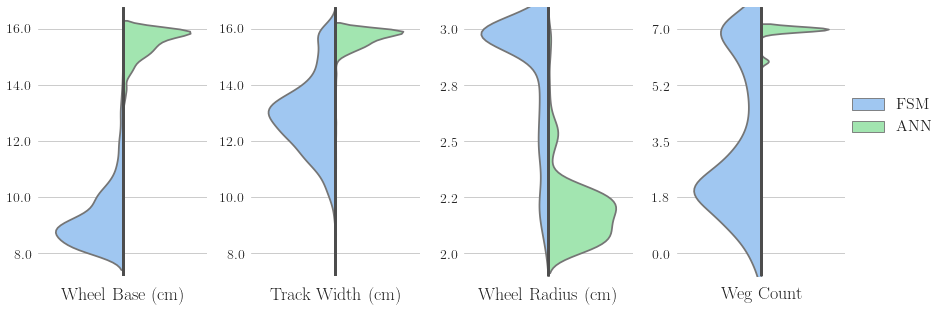

In [189]:
# Physical Characteristics

col_names = ['Wheel Base', 'Track Width', 'Wheel Radius', 'Weg Count']

df_fsm_phys = df_fsm_best[col_names].copy()
df_bnn_phys = df_bnn_best[col_names].copy()
df_fsm_phys['Category'] = 'FSM'
df_bnn_phys['Category'] = 'ANN'
df = pd.concat([df_fsm_phys, df_bnn_phys], keys=['FSM', 'ANN'], axis=0)
df['all'] = ''


col_offset = 5
col_count = 4
col_names = df_fsm.columns[col_offset:col_offset + col_count]
ncols = len(col_names)
fsize = ncols * 3, 9/2
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=fsize)

for col, col_name in enumerate(col_names):
    m = fsm_map[col]
    ymin, ymax = m['T'](m['minval']), m['T'](m['maxval'])
    
    # Plot the violin for this parameter
#     sns.violinplot(df_fsm[col_name], ax=axes[col], orient='v')
    sns.violinplot(x='all', y=col_name, hue='Category', data=df, ax=axes[col]
                   , inner=None
                   , split=True
                   , scale_hue=False
                   , scale='width'
                  )

    # Set the y limits with some padding
    y_padding = (ymax - ymin) * 0.1
    ylims_with_padding = [ymin - y_padding, ymax + y_padding]
    axes[col].set_ylim(ylims_with_padding)
    
    # Prettify the lines and ticks
    yticks = np.linspace(ymin, ymax, num=5)
    axes[col].set_yticks(yticks)
    axes[col].set_yticklabels([round(yval, 1) for yval in yticks], fontsize=14)
    axes[col].set_xlabel(fsm_fancy_names[col], fontsize=18)
    axes[col].set_ylabel('')
    
    axes[col].legend_.remove()
    axes[col].plot([0, 0], ylims_with_padding, color='0.3', linestyle='-', linewidth=3)
    
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
axes[-1].legend(loc=(1,0.5), fontsize=16)

# fig.savefig('morph-params.png')
# handles, labels = axes[-1].get_legend_handles_labels()
# lgd = axes[-1].legend(handles, labels, loc=(1, 0.5), fontsize=16)#, bbox_to_anchor=(0.5,-0.1))

# fig.savefig('params1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
# fig.savefig('params2.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
